# 4.3 数値微分

## 4.3.1 微分

$$
\frac{df(x)}{dx} = \lim_{h \to 0}\frac{f(x+h)-f(x)}{h}
$$


In [3]:
# 悪い実装例
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

上のコードは一応通るが、ｈの丸め誤差が生じる

In [4]:
# 丸め誤差
import numpy as np
np.float32(1e-50)

0.0

$ 10^{-4} $ ならどうなる?

In [7]:
np.float32(1e-4)

9.9999997e-05

In [10]:
# 改善版(hの変更と、中心差分の利用)
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2*h)

- 数値微分は、たぶん、コンピュータでは「無限にゼロに近づける」ということができないからだろう。
- 授業でならったのは、「解析的な微分」。( $ y=x^2 $ の微分は$ \frac{dy}{dx} = 2x $ )

## 4.3.2 数値微分の例

$$
y = 0.01x^2+0.1x
$$

In [12]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [13]:
import numpy as np
import matplotlib.pylab as plt

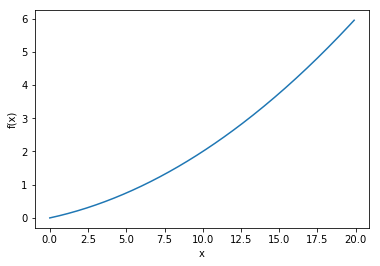

In [14]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [16]:
# x=5のとき
numerical_diff(function_1, 5)


0.1999999999990898

In [18]:
# x=10のとき
numerical_diff(function_1, 10)


0.2999999999986347

$$
f(x) = 0.01x^2+0.1x
$$
の解析的な解は
$$
\frac{df(x)}{dx} = 0.02x+0.1
$$
なので、$ x=5 $ , $ x=10 $ での「真の微分」は$ 0.2,0.3 $となり、数値微分とは厳密には一致しないが、近似している。

0.1999999999990898


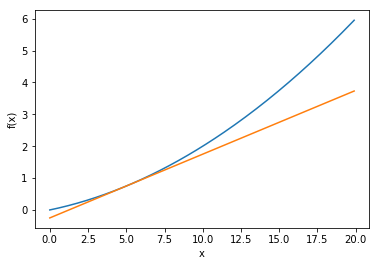

In [19]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

0.2999999999986347


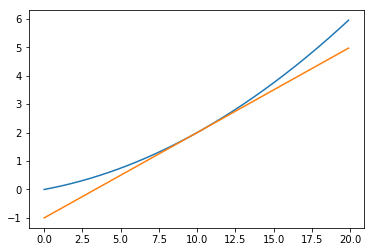

In [20]:
tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 4.3.3 偏微分

$$
f(x_0 , x_1) = x_0^2 + x_1^2
$$

In [21]:
# 実装
def function_2(x):
    return x[0]**2 + x[1]**2
    # または
    # return np.sum(x**2)

変数が2つある関数の微分は偏微分という

$ \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}, $のように、書く。

$ \partial $はラウンドデルタと呼ぶ模様。今日の人は、ラウンドとも、呼んでいた。


#### 問１：$ x_0=3,x_1=4 $のときの$x_0$に対する偏微分$ \frac{\partial f}{\partial x_0} $を求めよ。

In [23]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

#### 問2：$ x_0=3,x_1=4 $のときの$x_1$に対する偏微分$ \frac{\partial f}{\partial x_1} $を求めよ。

In [24]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119